In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:

df = pd.read_csv('/home/vaibhav-mishra/ML/projects/notebook/exams.csv')

In [3]:
x = df.drop('math score',axis=1)
y = df['math score']

In [4]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group D,some college,standard,completed,70,78
1,male,group D,associate's degree,standard,none,93,87
2,female,group D,some college,free/reduced,none,76,77
3,male,group B,some college,free/reduced,none,70,63
4,female,group D,associate's degree,standard,none,85,86


In [5]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group D' 'group B' 'group C' 'group E' 'group A']
Categories in'parental level of education' variable: ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['completed' 'none']


In [6]:
#create column tranformer with with three types of transformer
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer, cat_features),
        ("StandardScaler",numeric_transformer, num_features )
    ]
)

In [7]:
x = preprocessor.fit_transform(x)

In [8]:
x.shape

(1000, 19)

In [9]:
###train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [13]:
###Creating an evaluate function to give all metrics after model training 
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_score1 = r2_score(true,predicted)
    return mae,rmse,r2_score1

In [14]:
models = {
    "LinearRegression" : LinearRegression(),
    "Lasso": Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbour Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest" : RandomForestRegressor(),
    "Xgboost" : XGBRegressor(),
    "Catboosting" : CatBoostRegressor(),
    "Adaboosting" : AdaBoostRegressor()
}
model_list = []
r2_list = []


In [17]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    
    #make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred )


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print("Model performance for training set :")
    print("- Root mean squared error: {:.4f}".format(model_train_rmse))
    print("- Mean absolute error : {:.4f}".format(model_train_mae))
    print("- R2 score : {:.4f}".format(model_train_r2))

    print("----------------------------------------------------------------------------------------")

    print("Model performance for test set :")
    print("- Root mean squared error: {:.4f}".format(model_test_rmse))
    print("- Mean absolute error : {:.4f}".format(model_test_mae))
    print("- R2 score : {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print("\n")

LinearRegression
Model performance for training set :
- Root mean squared error: 5.4720
- Mean absolute error : 4.3891
- R2 score : 0.8723
----------------------------------------------------------------------------------------
Model performance for test set :
- Root mean squared error: 4.9838
- Mean absolute error : 4.0735
- R2 score : 0.8875


Lasso
Model performance for training set :
- Root mean squared error: 6.7208
- Mean absolute error : 5.4576
- R2 score : 0.8074
----------------------------------------------------------------------------------------
Model performance for test set :
- Root mean squared error: 6.8090
- Mean absolute error : 5.3757
- R2 score : 0.7900


Ridge
Model performance for training set :
- Root mean squared error: 5.4721
- Mean absolute error : 4.3883
- R2 score : 0.8723
----------------------------------------------------------------------------------------
Model performance for test set :
- Root mean squared error: 4.9874
- Mean absolute error : 4.0732


In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by = ["R2_Score"],ascending = False)

,Model Name,R2_Score
0,LinearRegression,0.887488
2,LinearRegression,0.887328
7,Random Forest,0.874470
5,K-Neighbour Regressor,0.854386
8,Xgboost,0.836505
6,Decision Tree,0.826102
3,Lasso,0.810209
1,LinearRegression,0.789992
4,Ridge,0.756346


In [20]:
###So we will go with LInear regression
lin_model = LinearRegression(fit_intercept  = True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is  %.2f" %score)

Accuracy of the model is  88.75


Text(0, 0.5, 'Predicted')

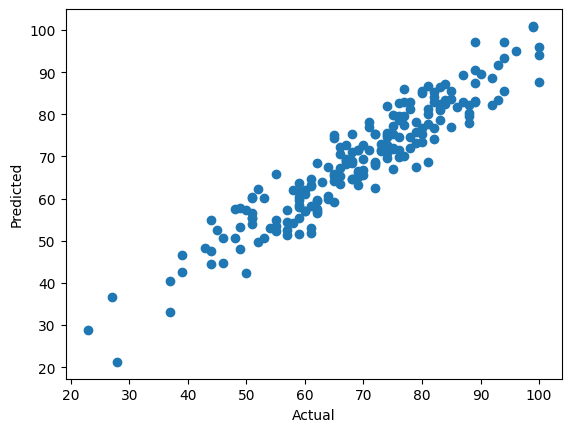

In [21]:
#plot y_pred and y_test
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

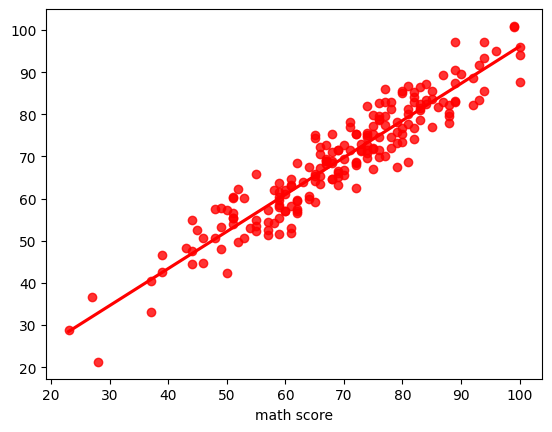

In [22]:
sns.regplot(x = y_test, y = y_pred, ci =None, color = 'red')

In [25]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,67,68.184361,-1.184361
737,78,81.306396,-3.306396
740,39,42.646078,-3.646078
660,70,69.310052,0.689948
411,90,89.600674,0.399326
...,...,...,...
408,100,87.589090,12.410910
332,66,70.499739,-4.499739
208,66,63.421025,2.578975
613,68,64.643819,3.356181
